
#  Investigate a Dataset (Patients noshow appointments-may-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


# Question 
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import pandas as pd 
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# exploring the shape of data
df.shape

(110527, 14)

Data consist of 110527 row and 14 columns 

In [4]:
# check for duplications
df.duplicated().sum()

0

No duplicate rows

In [5]:
# check the number of unique values 
df["PatientId"].nunique()

62299

only 62299 out of 110527 are unique values 

In [6]:
#check the number of duplicated patient id
df["PatientId"].duplicated().sum()

48228

There are 48228 duplicated ID

In [7]:
#check the number of duplicated patient ids and noshow 
# to check if there were patient id duplicated but differ in the no show status
df.duplicated(["PatientId","No-show"]).sum()

38710

There are 38710 patient have the same status of showing or no. will remove them in the cleaning data stage 

In [8]:
# inspection for missing values or any issue to be handeled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing value 

In [9]:
# getting some information about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


mean age is 37, max age is 115, min age is -1 which is probably mistake(l will remove it as it s only single value and I guess it was a mistake and it would not affect our analysis about 55% of ages are between 18 and 55 years old about 25% received SMS Majority doesn't have chronic diseases, being alcohol addictives nar enrolled in scholarschip

#### Here are some initial observations:
- There are 13 independent variables and one dependent (no_show) in the dataset.
- The dataset does not contain any missing values (NaNs).
- The patient_id data type is float but should be int.
- The scheduled_day and appointment_day columns type should be changed to datetime.
- The appointment_day has no hour specified (it equals to 00:00:00). We will not be able to analyze if the appointment hour has anything to do with no shows.
- There could be interesting to know how much time passed between a visit scheduling time and the actual visit time. There is no such data column but this can be calculated from scheduled_day and appointment_day columns.
- Another interesting question would be how show and no-show appointments are distributed among days of week. To explore this I will calculate a column called appointment_dow.

In [89]:
# the row index of -1 value for the age 
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning

In [90]:
# removing the -1 value for age 
df.drop(index=99832,inplace=True)

In [91]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Additional observations
- age: The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55. There is a data range problem in the dataset. The age value cannot be below 0, and there are some very old people as well. To be investigated.
- handicap: is represented by 4 classes as opposed to other categorical variables in this dataset. This can be a result of an error or there are 4 categories used. Both options are potentially valid and this should be confirmed by an SME.
- sms_received: 75% of patients received sms regarding an appointment.
- awaiting_time_days: 10 days on average patients waited for an appointment. 50% of patients waited up to 4 days and 75% up to 15 days for an appointment. The longest awaiting time was 179 days. There is at least one case where a visit happened 6 days before it was scheduled. This should not happen and will be further investigated.

#### correction of columns names

In [92]:

df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)


In [93]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### remaving duplicated Ids with duplicated showing status , Leaving the duplicated Ids if they differ in the showing status 
#### as the same patient may have several appointments, attend some and absent from others

In [94]:
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71816, 14)

In [95]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data wranling summary
We explored the data set's basic properities, then we checked if there were duplicate appointments, if there was duplicated patients IDs, if there was any missing data to handle, and finally we cleaned our data.


## Exploratory Data Analysis
Now that we've trimmed and cleaned your data, we're ready to move on to exploration. Computing statistics and creating visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### General look

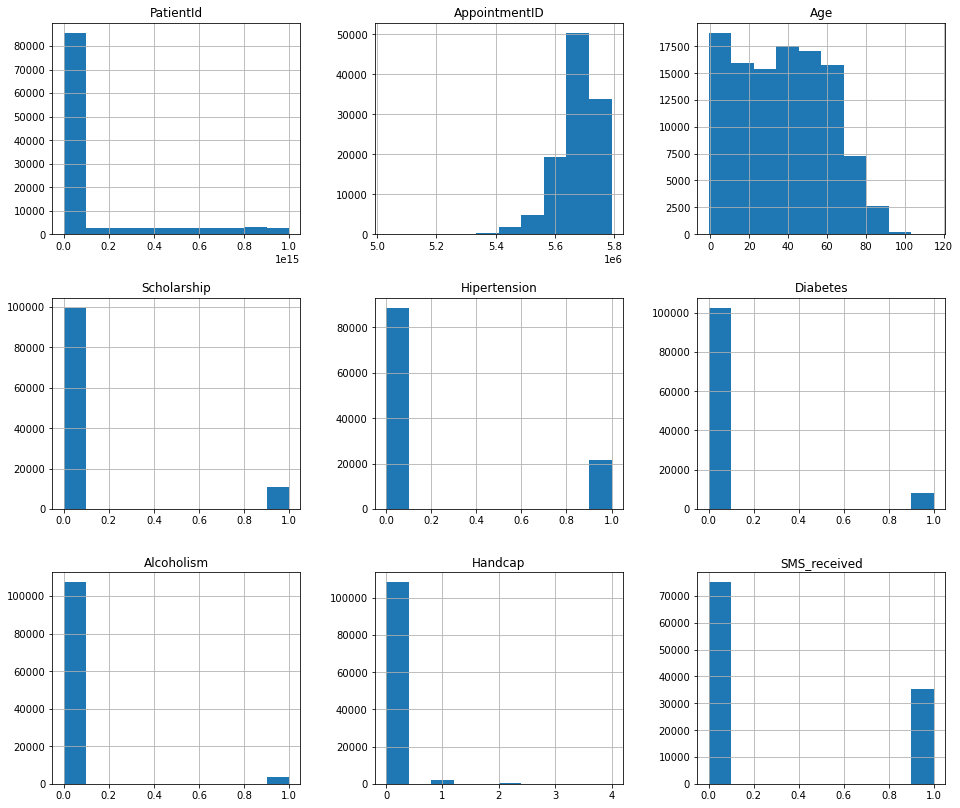

In [10]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,14));

#### Histogram observations
- age: There are many very young people in the dataset but in general the patients age is distributed evenly and the number of patients goes drastricly down for patients older than 60 years.
- alcoholism: Most of the patients are not alcoholics.
- diabetes: Most of the patients are not diabetes but more than alcoholics.
- handicap: There are for handicap categories with most of the people not being handicapted.
- hypertension: Most patients do not have hypertension diagnosed.

#### dividing the patients to 2 groups

In [97]:
show = df.No_show=='No'
noshow = df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [98]:
df[show].mean(),df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for showed patients is 37, no showed is 34 showed patients receive sms less than no show patients which means we have to revise our sms compaghine

### Investigation for the influencing factors on the attendance rate

#### Does age affect the attendence?

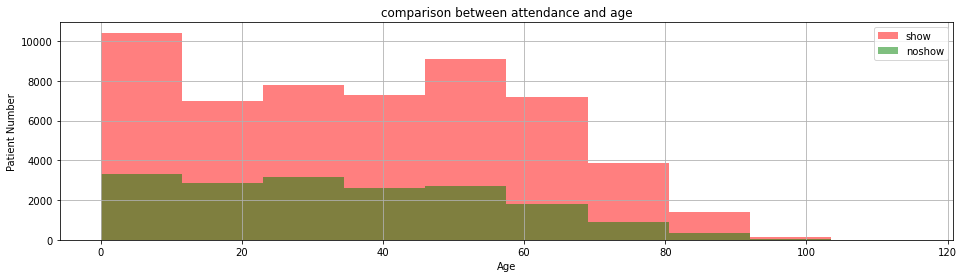

In [99]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='red',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='green',label='noshow')
    plt.legend();
    plt.title("comparison between attendance and age")
    plt.xlabel("Age")
    plt.ylabel("Patient Number");

attendance(df,'Age',show,noshow)    
    
    

    

Ages from 0:8 are the most showing(parents taking care of their kids) then from 45:55 and the least attending are whom above 65 years old

#### Does age and chronic disease affect the attendance together?

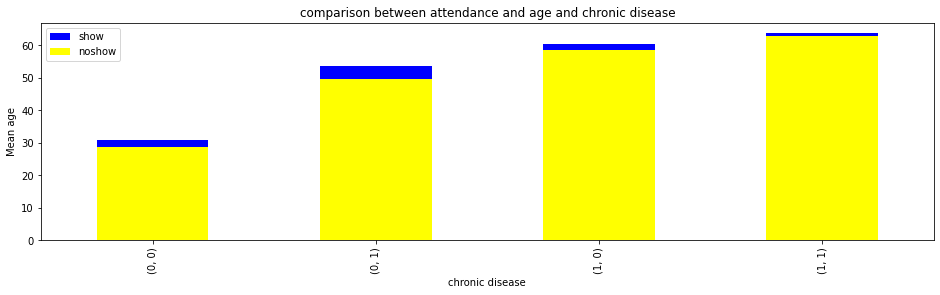

In [100]:
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color = 'blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color = 'yellow',label='noshow')
plt.legend();
plt.title('comparison between attendance and age and chronic disease')
plt.xlabel('chronic disease')
plt.ylabel('Mean age');

So age and chronic diseases affect attendance

In [101]:
df[show].groupby(['Hypertension','Diabetes']).mean(),df[noshow].groupby(['Hypertension','Diabetes']).mean()

(                             Age  Scholarship  Alcoholism   Handcap  \
 Hypertension Diabetes                                                 
 0            0         30.713360     0.095421    0.017156  0.014069   
              1         53.701370     0.078082    0.046575  0.034247   
 1            0         60.270517     0.081297    0.051582  0.041677   
              1         63.764303     0.064677    0.035759  0.057836   
 
                        SMS_received  
 Hypertension Diabetes                
 0            0             0.296185  
              1             0.252055  
 1            0             0.310522  
              1             0.289179  ,
                              Age  Scholarship  Alcoholism   Handcap  \
 Hypertension Diabetes                                                 
 0            0         28.768691     0.111211    0.021937  0.012079   
              1         49.481172     0.104603    0.046025  0.012552   
 1            0         58.650380     0.103

mean age of non chronic diseases showing patients is 30 and non showing is 28 mean age of Hypertensive diabetic showing patients is around 64 and non showing is about 63 which means that there is a correlation between age and chronic diseases, and no correlation between chronic diseases and attending

#### Does sex affect the attendence ?

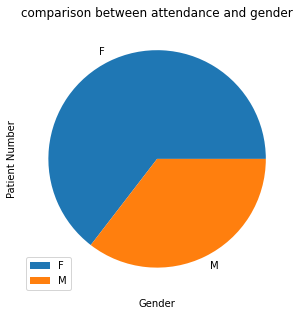

In [102]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[12,5])
    df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
    
    plt.legend();
    plt.title("comparison between attendance and gender")
    plt.xlabel("Gender")
    plt.ylabel("Patient Number");

attendance(df,'Gender',show,noshow) 

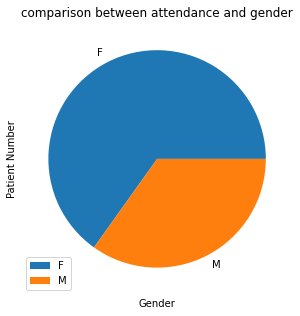

In [103]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[12,5])
    df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='noshow')
    plt.legend();
    plt.title("comparison between attendance and gender")
    plt.xlabel("Gender")
    plt.ylabel("Patient Number");

attendance(df,'Gender',show,noshow) 

gender has no clear affect in attandance

#### Does sex affect the attendence (Check by gender mean age) ?

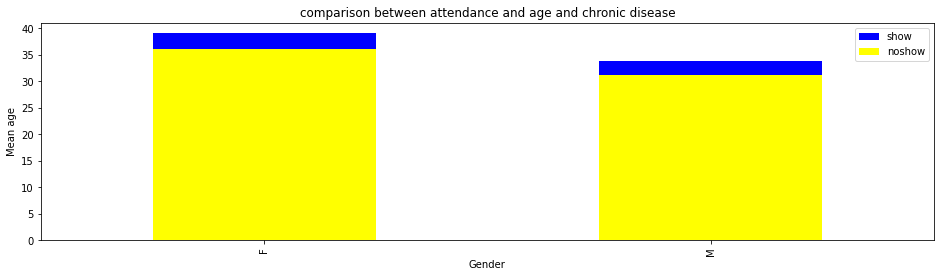

In [104]:
plt.figure(figsize=[16,4])
df[show].groupby(['Gender']).Age.mean().plot(kind='bar',color = 'blue',label='show')
df[noshow].groupby(['Gender']).Age.mean().plot(kind='bar',color = 'yellow',label='noshow')
plt.legend();
plt.title('comparison between attendance and age and chronic disease')
plt.xlabel('Gender')
plt.ylabel('Mean age');

In [105]:
print(df[show].groupby(['Gender']).Age.mean(),df[noshow].groupby(['Gender']).Age.mean(),df[show].groupby(['Gender']).Age.median(),df[noshow].groupby(['Gender']).Age.median())

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64 Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64 Gender
F    39
M    32
Name: Age, dtype: int64 Gender
F    34
M    29
Name: Age, dtype: int64


So gender does not affect attendance

#### Does SMS_received affect the attendence?

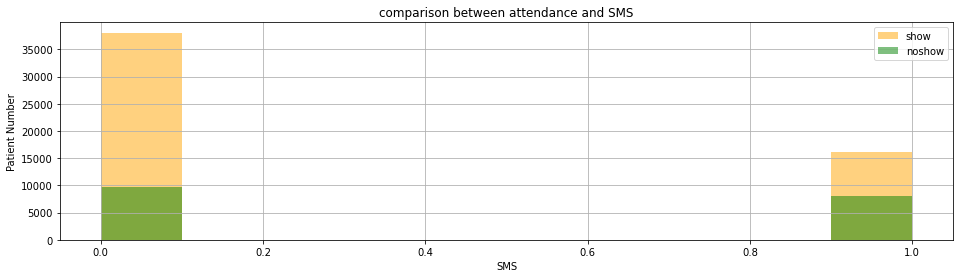

In [106]:
def attendance(df,col_name,attended,absent):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='orange',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='green',label='noshow')
    plt.legend();
    plt.title("comparison between attendance and SMS")
    plt.xlabel("SMS")
    plt.ylabel("Patient Number");

attendance(df,'SMS_received',show,noshow)

Number of showing patients without receiving sms is greater than showing patients with receiving sms, which means that we need to revisit our sms compaghin

#### Does Neighbourhood affect the attendence ?

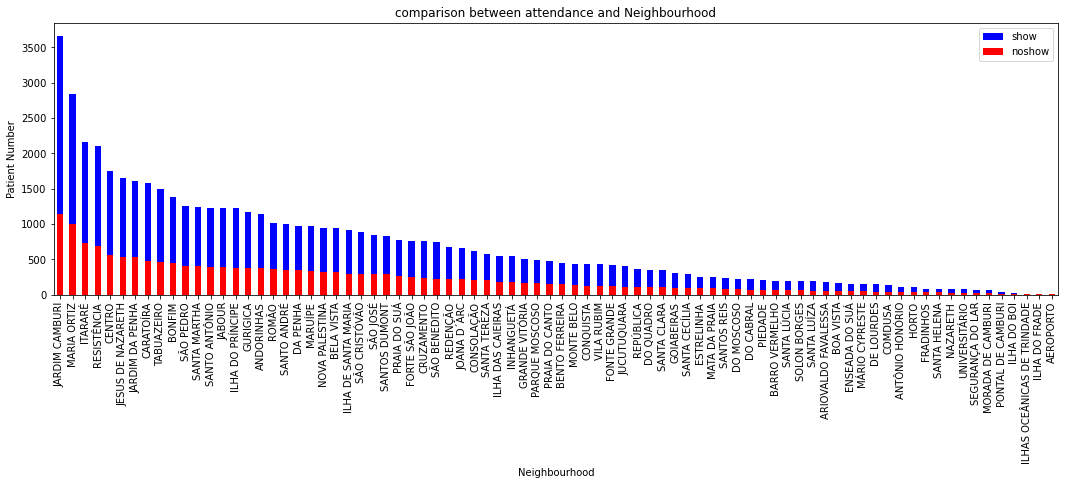

In [107]:

plt.figure(figsize=[18,5])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title("comparison between attendance and Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patient Number");


So, the neighborhood clearly affects the attendance

#### Does Neighbourhood affect the attendence (Check by SMS mean )?

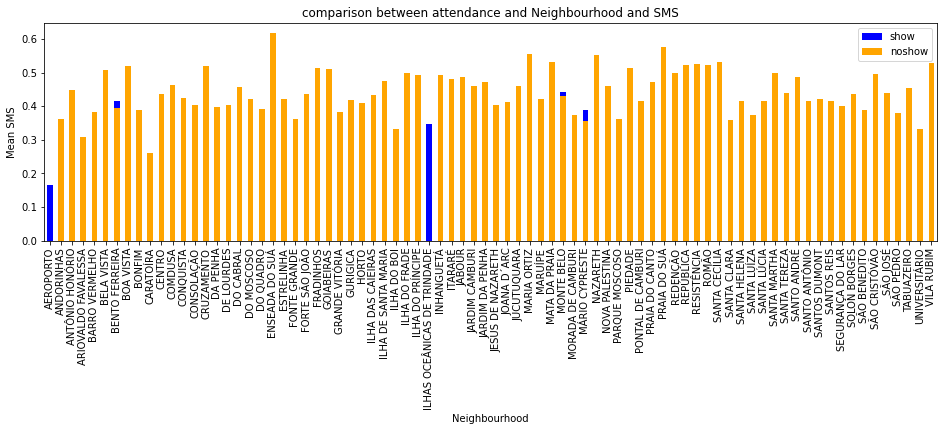

In [108]:
plt.figure(figsize=[16,4])
df[show].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='bar',color = 'blue',label='show')
df[noshow].groupby(['Neighbourhood']).SMS_received.mean().plot(kind='bar',color = 'orange',label='noshow')
plt.legend();
plt.title('comparison between attendance and Neighbourhood and SMS')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean SMS');

There are a lot of places that did not reach them

# Conclusions

- We explored the data set's basic properities, then we checked if there were duplicate appointments, if there was duplicated patients IDs, if there was any missing data to handle, and finally we cleaned our data.
- For patients with hypertensive diabetes, the mean age of non-chronic diseases is 30 and the mean age of patients with hypertensive diabetes is 63.
- The number of patients who have not received sms is greater than the number of patients who have received sms.


# Limitations

No clear correlation between showing and gender, chronic diseases, enrollment in the welfare program